<a href="https://colab.research.google.com/github/sailakshmi-0927/sailakshmi-0927/blob/main/LabSheet_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

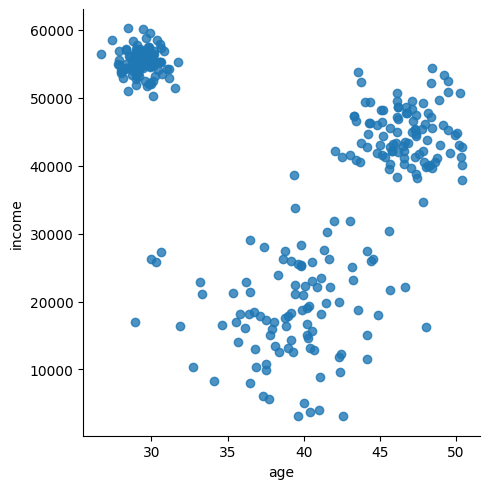

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv("/content/Income Data (1).csv")
sn.lmplot(x="age",y="income",data=df,fit_reg=False)

In [2]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_df=scaler.fit_transform(df[["age","income"]])
scaler_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [5]:
from sklearn.cluster import KMeans
clusters=KMeans(3)
clusters.fit(scaler_df)
df["new_clusterid"]=clusters.labels_
df.groupby("new_clusterid")[['age','income']].agg(['mean','std']).reset_index()

new_clusterid        age                  income             
                      mean       std          mean          std
0             0  39.140206  3.558665  18321.649485  6924.747691
1             1  29.384000  0.921458  55204.000000  1951.943864
2             2  46.627184  2.151559  44308.737864  4390.321503

Text(0, 0.5, 'sum of squared Errors')

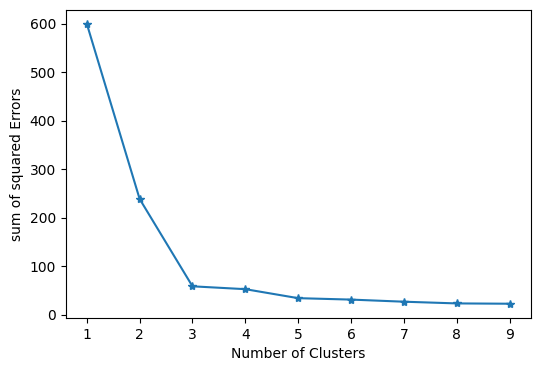

In [7]:
cluster_range=range(1,10)
cluster_errors=[]
for num_clusters in cluster_range:
  clusters=KMeans(num_clusters)
  clusters.fit(scaler_df)
  cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors,marker="*")
plt.xlabel("Number of Clusters")
plt.ylabel("sum of squared Errors")